# <p style="background-color:#000080; font-family:calibri; color:white; padding-top: 30px; padding-bottom: 30px;font-size:100%; text-align:center; border-radius:15px 50px;"> Laptop Price</p>


# <p style="background-color:#4169E1; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sys
sys.path.append("../")
from Utils.common_function import common_Fucnation,train_and_evaluate_model,train_and_evaluate_multiple_models

# <p style="background-color:#4169E1; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 2 | Load Data And Read Data </p>


In [61]:
df = pd.read_csv(r'D:\Project\Python\Class\bia_laptop_price\laptop_price.csv', encoding='unicode_escape')
comm_fun = common_Fucnation()

In [62]:
df.head(4)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45


# <p style="background-color:#4169E1; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 3 | Preprocess the Data </p>


In [63]:
df = comm_fun.replace_values(data=df,column="OpSys",to_replace={'Windows 10 S': 'Windows 10', 'Mac OS X': 'macOS'},)

d:\Project\Python\Class\project_bia\project_laptop_price\..\Utils\common_function.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].replace(to_replace, inplace=True)


In [64]:
df = comm_fun.remove_rows(data=df,column="OpSys",value="Android")
df['OpSys'].value_counts()

OpSys
Windows 10    1080
No OS           66
Linux           62
Windows 7       45
Chrome OS       27
macOS           21
Name: count, dtype: int64

In [65]:
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df['ScreenResolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1301, dtype: object

In [66]:
import re

df['resolution'] = df['ScreenResolution'].apply(lambda x: re.search(r'\d+x\d+', x).group())

df[['resolution_width', 'resolution_height']] = df['resolution'].str.split('x', expand=True)
df['resolution_width'] = df['resolution_width'].astype(int)
df['resolution_height'] = df['resolution_height'].astype(int)

In [67]:
df['TypeName'].unique()
df['TypeName'].replace('Netbook', 'Notebook', inplace=True)

C:\Users\jay\AppData\Local\Temp\ipykernel_9236\1288610238.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TypeName'].replace('Netbook', 'Notebook', inplace=True)


In [68]:
df.head(5)

df['Ram'] = df['Ram'].replace(r'GB', '', regex=True)

df['Ram'] = df['Ram'].astype(int)

In [69]:
df['Cpu_Brand'] = df['Cpu'].str.split().str[0]

df['Cpu_Type'] = df['Cpu'].str.extract(r'(Core \w+\d|Atom|FX|Celeron|E-Series|Ryzen|A\d+-Series|Pentium|Xeon|Core M)')

df['Cpu_ClockSpeed'] = df['Cpu'].str.extract(r'(\d+\.\d+GHz|\d+GHz)')

In [70]:
df = comm_fun.all_label_encode(data=df)

<Axes: xlabel='Price_euros'>

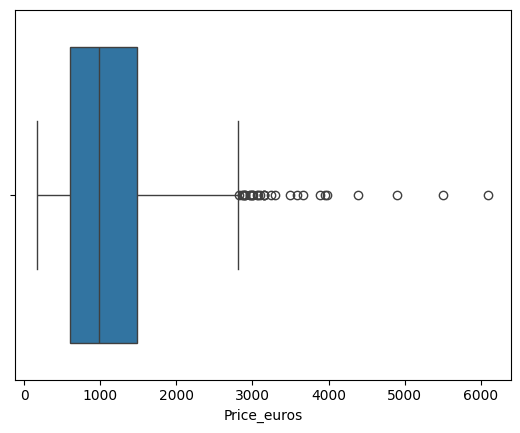

In [71]:
sns.boxplot(x = 'Price_euros',data = df)

In [72]:
df = comm_fun.remove_outliers(data=df,column='Price_euros')

<Axes: xlabel='Price_euros'>

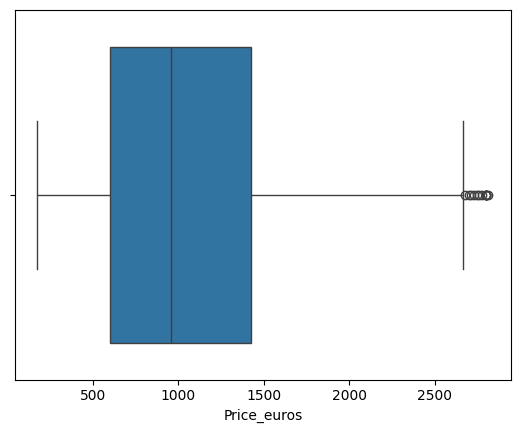

In [73]:
sns.boxplot(x = 'Price_euros',data = df)

In [74]:
X = df.drop(columns=['Price_euros', 'laptop_ID','Company','resolution','ScreenResolution','TypeName',])
y = df['Price_euros']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <p style="background-color:#4169E1; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 4 | Train And Evaluate Model </p>


In [76]:
y_pred, r2, model = train_and_evaluate_model(
    model=LinearRegression(),
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)

Model Type: Regressor
R² Score: 0.7429444268893921


In [77]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
# from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

models = [
    # Classifier
    RandomForestClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    KNeighborsClassifier(),
    # Regressor
    RandomForestRegressor(),
    LinearRegression(),
    DecisionTreeRegressor(),
    # SVR(),
    KNeighborsRegressor()
]

results_reg = train_and_evaluate_multiple_models(models[5:], X_train, X_test, y_train, y_test)
# results_reg_singe_model = train_and_evaluate_model(SVR(), X_train, X_test, y_train, y_test)

Model: RandomForestRegressor (Regressor) -> R² Score: 0.8772565947591403
Model: LinearRegression (Regressor) -> R² Score: 0.7429444268893921
Model: DecisionTreeRegressor (Regressor) -> R² Score: 0.80467178872177
Model: KNeighborsRegressor (Regressor) -> R² Score: 0.7148186557163994
